Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages: a. Loading and preprocessing the image data b. Defining the model's architecture c. Training the model d. Estimating the model's performance

Train: (60000, 28, 28, 1) (60000, 10)
Test: (10000, 28, 28, 1) (10000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 137s 319ms/step - accuracy: 0.8377 - loss: 0.5112 - val_accuracy: 0.9865 - val_loss: 0.0499
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 128s 304ms/step - accuracy: 0.9720 - loss: 0.0954 - val_accuracy: 0.9875 - val_loss: 0.0436
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 301ms/step - accuracy: 0.9801 - loss: 0.0683 - val_accuracy: 0.9915 - val_loss: 0.0333
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 127s 301ms/step - accuracy: 0.9818 - loss: 0.0566 - val_accuracy: 0.9905 - val_loss: 0.0364
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 122s 288ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.9903 - val_loss: 0.0339
Test Accuracy: 0.9896 | Test Loss: 0.0283


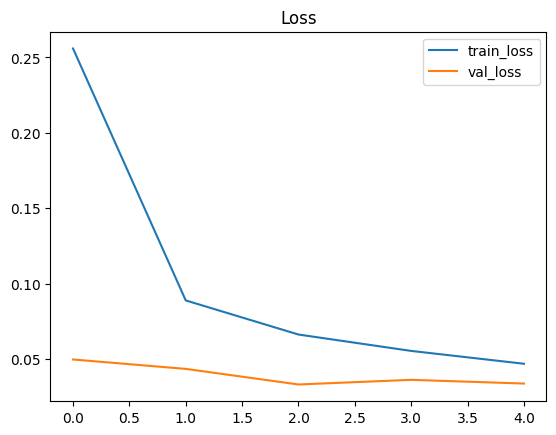

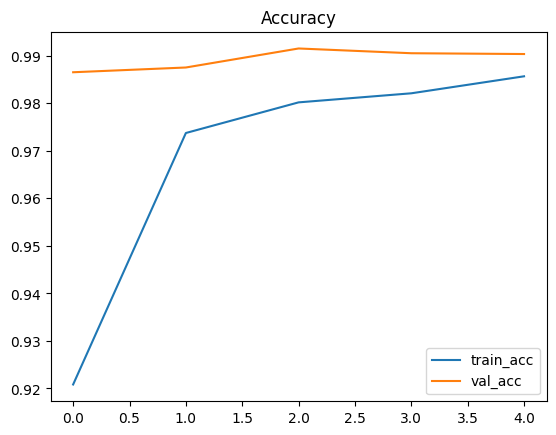

In [2]:
# ===== Stage A: Load & Preprocess from CSV =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# ---- Load CSVs ----
train_df = pd.read_csv("mnist_train.csv")   # your local CSV
test_df  = pd.read_csv("mnist_test.csv")

# ---- Split X and y ----
y_train = train_df.iloc[:, 0].values      # last column = label
X_train = train_df.iloc[:, :-1].values     # all other columns = pixels

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, :-1].values

# ---- Normalize and reshape ----
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# reshape: (N, 784) → (N, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# ---- One-hot encode labels ----
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

# ===== Stage B: Define CNN Architecture =====
model = Sequential([
    # helps learn features from 2D images
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    Conv2D(64, (3,3), activation="relu"),
    # reduces spatial dimensions (width, height)
    MaxPooling2D((2, 2)),
    # prevents overfitting
    Dropout(0.25),

    # dencse layers
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    #Softmax produces probabilities for categorical_crossentropy.
    Dense(10, activation="softmax")
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ===== Stage C: Train =====
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# ===== Stage D: Evaluate =====
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# ===== Plot =====
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(); plt.title("Loss"); plt.show()

plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend(); plt.title("Accuracy"); plt.show()


✅ 1. Core CNN Theory for MNIST (10 crisp lines)

A Convolutional Neural Network (CNN) is designed to learn spatial patterns from images using filters.

MNIST digits are 28×28 grayscale images; CNNs capture edges, curves, and shapes better than FNNs.

Convolution layers slide filters over the image to extract features like edges and textures.

ReLU introduces non-linearity so the network can learn complex shapes.

MaxPooling reduces dimensions while keeping important features, making training faster and reducing overfitting.

Flatten converts the 2D feature maps into a 1D vector for dense layers.

Dense layers combine the extracted features to make class predictions.

Dropout randomly disables neurons to avoid overfitting and improve generalization.

Softmax produces a probability distribution across 10 digit classes.

CNNs achieve higher accuracy on MNIST because they preserve spatial structure compared to FNNs.

✅ 2. Important Theory Points FOR YOUR CODE (clean + technical)
✅ Stage A — Loading & Preprocessing

train_df.iloc[:, 0] → extracts labels (digit 0–9).

train_df.iloc[:, :-1] → extracts 784 pixel values.

Normalizing (÷255) stabilizes gradients and speeds training.

Reshaping (N, 784) → (N, 28, 28, 1) restores image format needed for CNN.

One-hot encoding prepares labels for softmax.

✅ Stage B — CNN Architecture

Conv2D(32, 3×3) extracts low-level features (edges, lines).

Conv2D(64, 3×3) extracts higher features (curves, corners).

MaxPooling2D(2×2) reduces spatial size & overfitting.

Dropout(0.25) randomly disables 25% neurons to avoid overfitting.

Flatten() converts feature maps → vector.

Dense(128) learns classification-specific patterns.

Dropout(0.5) further regularizes dense layers.

Dense(10, softmax) outputs probability for each digit.

✅ Stage C — Training

Adam(lr=1e-3) adapts learning rate for faster convergence.

batch_size=128 gives efficient GPU usage + stable updates.

validation_split=0.1 helps detect overfitting during training.

epochs=2 (small for demo; generally 10–20 needed).

✅ Stage D — Evaluation

model.evaluate() computes test accuracy & loss on unseen images.

Higher test accuracy = model generalizes well.

✅ Plotting

Training vs validation loss → shows learning stability.

Accuracy curves → shows model improvement across epochs.

Divergence between curves → overfitting.

✅ 3. Why this CNN code looks more advanced than the FNN code

Because CNNs are built for image understanding, not raw pixel classification.

✅ FNN = treats image like a long list of numbers
✅ CNN = treats image like an image (height × width × channels)

CNN needs:

convolution

pooling

feature maps

multiple channels

reshaping

dropout

larger architecture

So the code naturally looks bigger + smarter.